# Investigating Fandango Movie Ratings

Our project will base on the Walt Hickey investigation about unexplained increasing the movie ratings on the Fandango platform. 
In our case we will analyze more recent movie ratings data to find if any changes in Fandango systems after the investigation.

In [4]:
#import libraries and datas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fandango = pd.read_csv('fandango_score_comparison.csv')
movie = pd.read_csv('movie_ratings_16_17.csv')

In [5]:
fandango.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [6]:
movie.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [7]:
fandango_pr = fandango.copy()[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference'] ]
fandango_pr.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [8]:
movie_pr = movie.copy()[['movie', 'year', 'fandango']]
movie_pr.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


***Fandango_pr*** is a data with movies before investigation. It have a two criteria of sampling:

- at least 30 fan reviews on Fandango
- films on Fandango.com had tickets on sale in 2015

***Movie_pr*** is a data with movies after the investigation. 

- movies had been realeased in 2016 and after
- unavoidable criteria with complete amout of rewies or votes

We can say that sampling is representative only for every data separately, cause they can have different purpose up to the moment of collecting. 
But we cannot say that sampling is representative for us, cause we don't have a equal entries for all available population regardless of the publication date.

Our new goal - find the difference between Fandango rating's scale for movie from 2015 and for movie from 2016. Criteria for movie's quality is a Hickey's benchmark - at least 30 fan review on Fandango.

## Create the Samples

As we know, all of movies from ***Fandango_pr*** are match the popular criteria. But we can't assert this for movies from ***Movie_pr***. 
We can find their status on the web-site now. For this we can create a random sample and check random movies.

In [9]:
movie_pr.sample(10, random_state = 10)

,movie,year,fandango
161,The Autopsy of Jane Doe,2016,4.5
120,Neighbors 2: Sorority Rising,2016,3.5
105,Masterminds,2016,3.5
148,Split,2016,4.0
69,Hidden Figures,2016,5.0
127,Ouija: Origin of Evil,2016,3.5
19,Beauty and the Beast,2017,4.5
175,The Forest,2016,3.0
47,Elvis & Nixon,2016,3.5
149,Star Trek Beyond,2016,4.5


Next goal - determine the one year. Lets select the year from FILM column.

In [10]:
fandango_pr['Year'] = fandango_pr['FILM'].str[-6:-1].str.replace('(', '')
fandango_pr['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

We can notice that 17 movies have a issue date in 2014 year. Iе don't satisfy our goals. Lets extract only the movies from 2015 year.

In [11]:
#choose only 2015's films

fandango_2015 = fandango_pr.copy()[fandango_pr['Year'] == '2015']
fandango_2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

In [12]:
#the same process for movie_pr

movie_pr['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [13]:
fandango_2016 = movie_pr.copy()[movie_pr['year']==2016]
fandango_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

In [14]:
print(len(fandango_2015))
print(len(fandango_2016))

129
191


Now we have two dataframe with Fandango's movies from 2015 year (129 films) and 2016 year (191 films).

### Comparison between 2015 and 2016 movies by shape of distribution

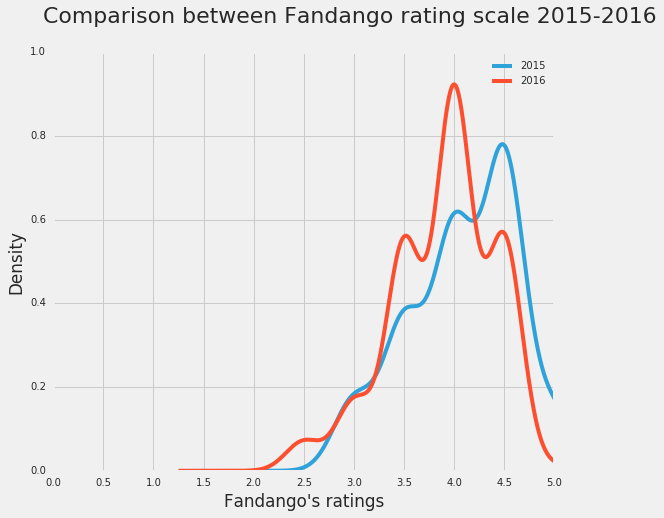

In [15]:
%matplotlib inline
import matplotlib.style as style
from numpy import arange

plt.style.use('fivethirtyeight')

fandango_2015['Fandango_Stars'].plot.kde(label='2015', legend=True, figsize=(8,7))
fandango_2016['fandango'].plot.kde(label='2016', legend=True)
plt.text(x=-0.1, y = 1.07, s='Comparison between Fandango rating scale 2015-2016', size=22)
plt.xlabel("Fandango's ratings")
plt.xlim([0,5])
plt.xticks(arange(0,5.1,.5))
plt.show()

The kernel density plots showed that 2016's rating scale have a lower results than 2015's. 

In [16]:
#make a frequency distributions

fandango_2015['Fandango_Stars'].value_counts(normalize=True) * 100

4.5    37.984496
4.0    28.682171
3.5    17.829457
3.0     8.527132
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [17]:
fandango_2016['fandango'].value_counts(normalize=True) * 100

4.0    40.314136
4.5    24.607330
3.5    24.083770
3.0     7.329843
2.5     3.141361
5.0     0.523560
Name: fandango, dtype: float64

We made frequency distributions for two years. We use a procentages frequencies, because we have a different number of movies in each year.  

We can make the next conclusions:

- The main direction - decrease the values of stars on 0.5 step, but hold the best movies on top from 4.5-5 mark to 4 mark;
- The portal tried to changed skewed distribution on normal distribution.

But this assumptions based on the plots more and don't have an evidence in table frequency distributios.

For next step we'll take each distribution of movie ratings and compute its mean, median, and mode, and then compare these statistics to determine what they tell about the direction of the difference.

In [23]:
#create the function for mean, median and mode list

def determine(dat, col):
    mean_com = round(dat[col].mean(), 2)
    median_com = round(dat[col].median(), 2)
    mode_com = round(dat[col].mode()[0], 2)
    return (mean_com, median_com,mode_com)

In [33]:
#creare the dataframe with mean, median and mode on 2015 year

fandango_2015_sum = list(determine(fandango_2015, 'Fandango_Stars'))
fandango_2016_sum = list(determine(fandango_2016, 'fandango'))
fandango_sum = pd.DataFrame(fandango_2015_sum, index=['mean', 'median', 'mode'], columns=['2015'])
fandango_sum

,2015
mean,4.09
median,4.00
mode,4.50


In [35]:
#append the 2016 year

fandango_sum['2016'] = fandango_2016_sum
fandango_sum

,2015,2016
mean,4.09,3.89
median,4.00,4.00
mode,4.50,4.00


We observe the obvious differences between mean and mode meaning is towards reduction and median value which wasn't change.

Let's create a plots.

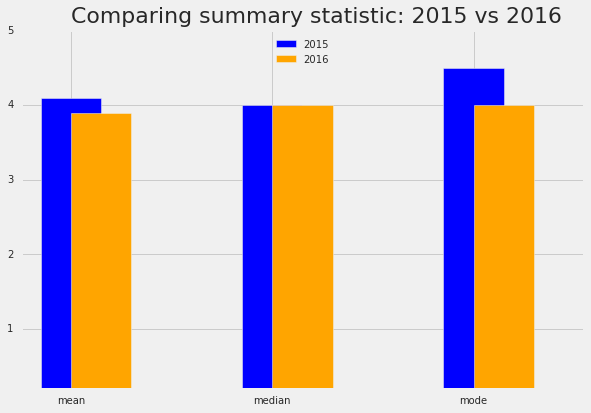

In [54]:
plt.style.use("fivethirtyeight")
fandango_sum['2015'].plot.bar(color='blue', label='2015', width=.3, align = 'center')
fandango_sum['2016'].plot.bar(color='orange', label='2016', width=.3, align = 'edge', figsize=[9,6])
plt.text(x=0, y=5.1, s='Comparing summary statistic: 2015 vs 2016', size=22)
plt.legend(loc = 'upper center')
plt.ylim([0.2, 5])
plt.xticks(rotation=0. )
plt.show()

We determined that popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.
But it's not significant. We can assume portal have repair their mechanism of derivation stars. But it was slighly. It looks like a visible, "needful" response. Distribution is not so skewed now. We can see 2.5 stars and not frequently 5 stars. All that changes to keep your thinking that they are the good fellas.
